<a href="https://colab.research.google.com/github/sczopek/spaceInvadersAtariRl/blob/main/doesStableBaselinePreprocessFrameSkips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check to see if Stable Basline's Atari Env wrapper automatically handles frameSkipping.  This is will determine if special preprocessing code is needed to handle the case of no frame skipping.

For tutorial on frame skipping pre-processing please see:
https://danieltakeshi.github.io/2016/11/25/frame-skipping-and-preprocessing-for-deep-q-networks-on-atari-2600-games/

In [ ]:
# stable-baselines3 = 'https://stable-baselines3.readthedocs.io/en/master/index.html'
!pip install "stable-baselines3[extra]<=2.3.1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 24.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.9 MB/s eta 0:00:00
Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446667 sha256=7097f44b6af7ba42f4a777ae042db903922b6418480f8267d0dfb89e2d91bf5a
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/gdrive


In [ ]:
import os
models_dir = "models/PPO"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [ ]:
# train ONLY one at a time
# then save trained model to disk
# load both trained models from disk to evaluate differences

trainFrameSkipModel = False
train_NoFrameSkipModel = False

# Train Frame Skip Model

In [ ]:
from stable_baselines3.common.callbacks import CheckpointCallback

if trainFrameSkipModel:
  # There already exists an environment generator that will make and wrap atari environments correctly.
  env = make_atari_env("SpaceInvaders-v4", n_envs=8, seed=0) # SpaceInvaders-v4 "SpaceInvadersNoFrameskip-v4"
  # Stack 4 frames
  vec_env = VecFrameStack(env, n_stack=4)

  # Save a checkpoint every 2_000_000 steps
  # n_envs=8, so save_freq=250_000*n_envs=8 = 2_000_000
  checkpoint_callback = CheckpointCallback(save_freq=250000, save_path="/content/gdrive/MyDrive/models/PPO",
                                          name_prefix="ppo_spaceInvadersFrameSkipWinningParams")

  model = PPO("CnnPolicy", vec_env, verbose=1, tensorboard_log="/content/gdrive/MyDrive/models/ppo_spaceinvaders_tensorboard/",
            batch_size=256,
            clip_range=0.001,
            ent_coef=0.01,
            learning_rate=0.0001,
            n_epochs=4,
            n_steps=128,
            vf_coef=0.5
            )


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# this training step takes several hours on an NVIDIA A100 GPU, which is a high end GPU device (y. 2024)

if trainFrameSkipModel:
  model.learn(total_timesteps=10000000, callback=[checkpoint_callback], reset_num_timesteps=False)

# Train No Frame Skip Model

In [ ]:
from stable_baselines3.common.callbacks import CheckpointCallback

if train_NoFrameSkipModel:
  # There already exists an environment generator that will make and wrap atari environments correctly.
  env = make_atari_env("SpaceInvadersNoFrameskip-v4", n_envs=8, seed=0) # SpaceInvaders-v4 "SpaceInvadersNoFrameskip-v4"
  # Stack 4 frames
  vec_env = VecFrameStack(env, n_stack=4)

  # Save a checkpoint every 2_000_000 steps
  # n_envs=8, so save_freq=250_000*n_envs=8 = 2_000_000
  checkpoint_callback = CheckpointCallback(save_freq=250000, save_path="/content/gdrive/MyDrive/models/PPO",
                                          name_prefix="ppo_spaceInvaders_noFrameSkip_winningParams")

  model = PPO("CnnPolicy", vec_env, verbose=1, tensorboard_log="/content/gdrive/MyDrive/models/ppo_spaceInvaders_noFrameSkip_winningParams/",
            batch_size=256,
            clip_range=0.001,
            ent_coef=0.01,
            learning_rate=0.0001,
            n_epochs=4,
            n_steps=128,
            vf_coef=0.5
            )

In [ ]:
# this training step takes several hours on an NVIDIA A100 GPU, which is a high end GPU device (y. 2024)

if train_NoFrameSkipModel:
  model.learn(total_timesteps=10000000, callback=[checkpoint_callback], reset_num_timesteps=False)

Streaming output truncated to the last 5000 lines.
|    value_loss           | 3.19         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 4.17e+03     |
|    ep_rew_mean          | 3.04e+03     |
| time/                   |              |
|    fps                  | 371          |
|    iterations           | 2378         |
|    time_elapsed         | 6549         |
|    total_timesteps      | 161233920    |
| train/                  |              |
|    approx_kl            | 0.0023563178 |
|    clip_fraction        | 0.783        |
|    clip_range           | 0.001        |
|    entropy_loss         | -0.812       |
|    explained_variance   | 0.782        |
|    learning_rate        | 0.0001       |
|    loss                 | 1.59         |
|    n_updates            | 629804       |
|    policy_gradient_loss | 0.00271      |
|    value_loss           | 4.85         |
---

# Compare Trained Models

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

# There already exists an environment generator that will make and wrap atari environments correctly.
env = make_atari_env("SpaceInvaders-v4", n_envs=8, seed=0) # SpaceInvaders-v4 "SpaceInvadersNoFrameskip-v4"
# Stack 4 frames
vec_env = VecFrameStack(env, n_stack=4)

model_wFrameSkip = PPO.load("/content/gdrive/MyDrive/models/PPO/ppo_spaceInvadersFrameSkipWinningParams_10000000_steps",
                            verbose=1,
                            force_reset=False)
model_wFrameSkip.set_env(vec_env)

ep_reward_wFrameSkip, ep_len_wFrameSkip = evaluate_policy(model_wFrameSkip, vec_env, n_eval_episodes=300, return_episode_rewards=True, deterministic=False)

Wrapping the env in a VecTransposeImage.


In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

modelNoFrameSkip = PPO.load("/content/gdrive/MyDrive/models/PPO/ppo_spaceInvadersLvl4Train_9989760_steps", verbose=1,
                 force_reset=False)

env = make_atari_env("SpaceInvadersNoFrameskip-v4", n_envs=8, seed=0)
# Stack 4 frames
vec_env = VecFrameStack(env, n_stack=4)
modelNoFrameSkip.set_env(vec_env)

ep_reward_noFrameSkip, ep_len_noFrameSkip = evaluate_policy(modelNoFrameSkip, vec_env, n_eval_episodes=300, return_episode_rewards=True, deterministic=False)

Wrapping the env in a VecTransposeImage.


# New Section

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

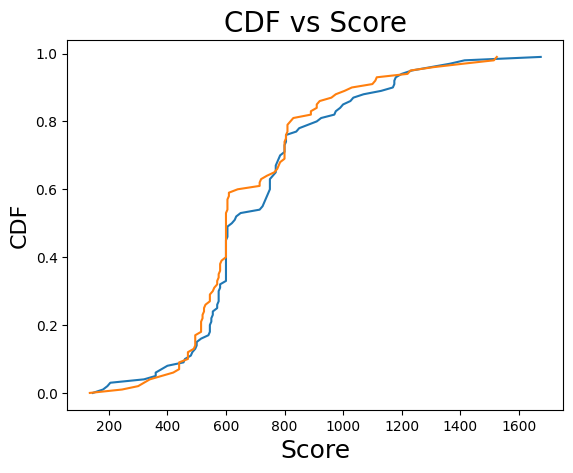

In [ ]:
# CDF Plot of Scores
N = n_eval_episodes=300
X1 = np.sort(ep_reward_wFrameSkip)
X2 = np.sort(ep_reward_noFrameSkip)
F1 = np.array(range(N))/float(N)
F2 = np.array(range(N))/float(N)

plt.plot(X1, F1)
plt.plot(X2, F2)
plt.title('CDF vs Score', fontsize = 20)
plt.xlabel('Score', fontsize = 18)
plt.ylabel('CDF', fontsize = 16)
plt.show()

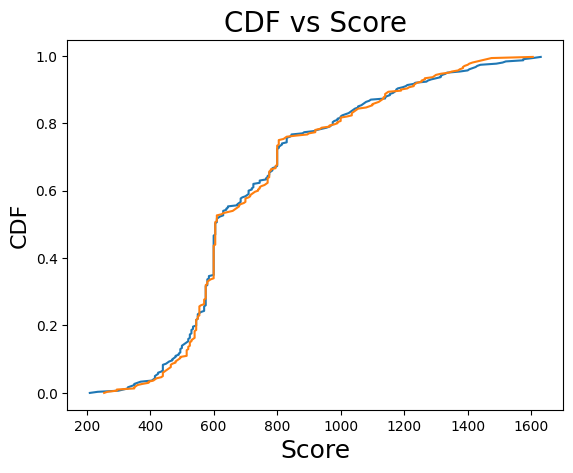

In [ ]:
# CDF Plot of Scores
N = n_eval_episodes=300
X1 = np.sort(ep_reward_wFrameSkip)
X2 = np.sort(ep_reward_noFrameSkip)
F1 = np.array(range(N))/float(N)
F2 = np.array(range(N))/float(N)

plt.plot(X1, F1)
plt.plot(X2, F2)
plt.title('CDF vs Score', fontsize = 20)
plt.xlabel('Score', fontsize = 18)
plt.ylabel('CDF', fontsize = 16)
plt.show()

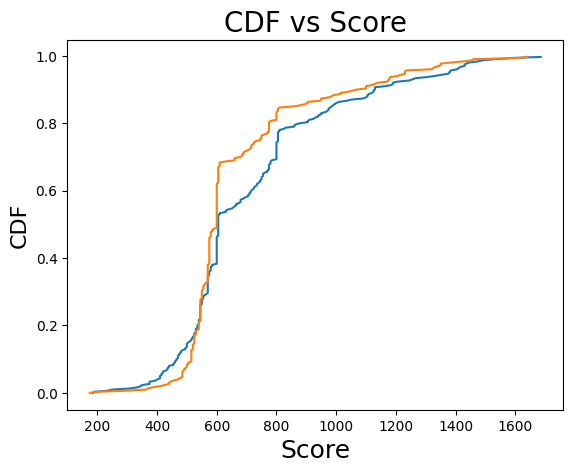

In [ ]:
# CDF Plot of Scores
N = n_eval_episodes=300
X1 = np.sort(ep_reward_wFrameSkip)
X2 = np.sort(ep_reward_noFrameSkip)
F1 = np.array(range(N))/float(N)
F2 = np.array(range(N))/float(N)

plt.plot(X1, F1)
plt.plot(X2, F2)
plt.title('CDF vs Score', fontsize = 20)
plt.xlabel('Score', fontsize = 18)
plt.ylabel('CDF', fontsize = 16)
plt.show()